# Import statements

In [1]:
import pandas as pd
import numpy as np

In [2]:
#!pip install imbalanced-learn

# Retrieve data from csv

In [3]:
# For colab
# from google.colab import drive
# drive.mount('/content/drive')

# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df.csv')
# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df_30_mfcc.csv')
# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df_40_mfcc.csv')

# For local machine or virtual environment
audio_df = pd.read_csv('final_df.csv')

# drop first column
audio_df.drop('Unnamed: 0', axis='columns', inplace=True)

from sklearn.utils import shuffle
audio_df = shuffle(audio_df)

audio_df.head()

,Emotions_with_gender,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5,Emotions_without_gender
9956,7,Tess\OAF_Pleasant_surprise\OAF_keg_ps.wav,-403.90305,64.230095,-1.063443,1.000598,11.919717,-9.755817,-16.681147,0.942610,...,8.194814e-04,3.925040e-04,2.556703e-05,-0.017666,0.006739,0.071879,0.031189,0.006589,-0.011068,7
1508,13,Crema\1001_TIE_NEU_XX.wav,-391.20657,134.248730,-9.691094,42.725430,3.584845,17.003365,-13.716040,-3.537411,...,9.686767e-11,9.524591e-11,9.424445e-11,-0.019552,0.002130,-0.047377,-0.003975,0.012620,-0.005876,5
11473,7,Tess\YAF_pleasant_surprised\YAF_whip_ps.wav,-343.29650,73.969610,8.904689,2.263415,-6.040947,-13.780964,-9.877522,-8.344698,...,2.953977e-03,2.399109e-03,2.383947e-04,-0.009135,0.015320,0.027681,0.012246,0.011701,-0.008165,7
7763,2,Crema\1078_ITH_DIS_XX.wav,-413.37378,133.566250,6.912002,54.202812,-8.386211,19.722614,-18.494354,9.689131,...,1.357194e-10,1.353046e-10,1.350059e-10,0.007191,0.003277,-0.089362,-0.034862,0.007028,0.009345,2
5875,5,Crema\1055_IOM_NEU_XX.wav,-420.26172,146.822450,6.768641,63.717300,-18.759165,23.189789,-13.800730,11.747415,...,1.241042e-09,1.222818e-09,1.211613e-09,-0.000610,0.004775,-0.017267,-0.022510,0.020913,-0.017033,5


# Define Class Labels Dictionary


In [4]:
# Define class labels dictionary for with gender
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

# Define class labels dictionary for without gender
label_map_without_gender = {
    0: 'angry',
    1: 'calm',
    2: 'disgust',
    3: 'fear',
    4: 'happy',
    5: 'neutral',
    6: 'sad',
    7: 'surprise'
}


# Train Test Split

In [5]:
# train-test split dataset
from sklearn.model_selection import train_test_split

final_df_testing = audio_df.copy()

# For non-augmented data
X = final_df_testing.drop(columns=['Path', 'Emotions_without_gender', 'Emotions_with_gender'], axis=1)
y = final_df_testing['Emotions_with_gender']

# For merged data (non-aug + aug)
# X = final_df_testing.drop(columns=['Path','Emotions'], axis=1)
# y = final_df_testing['Emotions']
print("Data shape:")
print(X.shape, y.shape)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.columns.tolist())
print("X_train shape:")
print(X_train.shape)
print("X_test shape:")
print(X_test.shape)

print("y_train shape:")
print(y_train.shape)
print("y_test shape:")
print(y_test.shape)

Data shape:
(11682, 173) (11682,)
X_train shape:
(9345, 173)
X_test shape:
(2337, 173)
y_train shape:
(9345,)
y_test shape:
(2337,)


# SMOTE

In [6]:
import imblearn

# Handle imbalance classes with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('\n')
print('Resample dataset shape', Counter(y_smote))
print(X_smote.shape)

Original dataset shape Counter({6: 883, 2: 878, 0: 877, 3: 874, 4: 868, 5: 776, 10: 627, 11: 617, 14: 612, 12: 607, 8: 601, 13: 510, 7: 385, 1: 77, 9: 77, 15: 76})


Resample dataset shape Counter({2: 883, 5: 883, 6: 883, 11: 883, 13: 883, 0: 883, 8: 883, 3: 883, 4: 883, 12: 883, 10: 883, 14: 883, 7: 883, 1: 883, 9: 883, 15: 883})
(14128, 173)


In [7]:
X_smote.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


# Data selection for training

## Create column range subset for model

In [8]:
# 1 feature
mfcc_columns = X_smote.filter(regex='^MFCC').columns
spectral_contrast_columns = X_smote.filter(regex='^SC').columns
chroma_columns = X_smote.filter(regex='^C').columns
mel_columns = X_smote.filter(regex='^MEL').columns
tonz_columns = X_smote.filter(regex='^TONZ').columns

# 2 features
mfcc_sc_columns = X_smote.filter(regex='^(MFCC|SC)').columns
mfcc_c_columns = X_smote.filter(regex='^(MFCC|C)').columns
mfcc_mel_columns = X_smote.filter(regex='^(MFCC|MEL)').columns
mfcc_tonz_columns = X_smote.filter(regex='^(MFCC|TONZ)').columns

sc_c_columns = X_smote.filter(regex='^(SC|C)').columns
sc_mel_columns = X_smote.filter(regex='^(SC|MEL)').columns
sc_tonz_columns = X_smote.filter(regex='^(SC|TONZ)').columns

c_mel_columns = X_smote.filter(regex='^(C|MEL)').columns
c_tonz_columns = X_smote.filter(regex='^(C|TONZ)').columns

mel_tonz_columns = X_smote.filter(regex='^(MEL|TONZ)').columns


# 3 features
mfcc_sc_c_columns = X_smote.filter(regex='^(MFCC|SC|C)').columns
mfcc_sc_mel_columns = X_smote.filter(regex='^(MFCC|SC|MEL)').columns
mfcc_sc_tonz_columns = X_smote.filter(regex='^(MFCC|SC|TONZ)').columns
mfcc_c_mel_columns = X_smote.filter(regex='^(MFCC|C|MEL)').columns
mfcc_c_tonz_columns = X_smote.filter(regex='^(MFCC|C|TONZ)').columns
mfcc_mel_tonz_columns = X_smote.filter(regex='^(MFCC|MEL|TONZ)').columns

sc_c_mel_columns = X_smote.filter(regex='^(SC|C|MEL)').columns
sc_c_tonz_columns = X_smote.filter(regex='^(SC|C|TONZ)').columns
sc_mel_tonz_columns = X_smote.filter(regex='^(SC|MEL|TONZ)').columns

c_mel_tonz_columns = X_smote.filter(regex='^(C|MEL|TONZ)').columns


# 4 features
mfcc_sc_c_mel_columns = X_smote.filter(regex='^(MFCC|SC|C|MEL)').columns
mfcc_sc_c_tonz_columns = X_smote.filter(regex='^(MFCC|SC|C|TONZ)').columns
mfcc_sc_mel_tonz_columns = X_smote.filter(regex='^(MFCC|SC|MEL|TONZ)').columns
mfcc_c_mel_tonz_columns = X_smote.filter(regex='^(MFCC|C|MEL|TONZ)').columns
sc_c_mel_tonz_columns = X_smote.filter(regex='^(SC|C|MEL|TONZ)').columns



In [9]:
# check length for each data column subset
print("MFCC: " + str(len(mfcc_columns)))
print("Spectral Contrast: " + str(len(spectral_contrast_columns)))
print("Chroma: " + str(len(chroma_columns)))
print("Mel: " + str(len(mel_columns)))
print("Tonz: " + str(len(tonz_columns)))
print("MFCC + Spectral Contrast: " + str(len(mfcc_sc_columns)))
print("MFCC + Chroma: " + str(len(mfcc_c_columns)))
print("MFCC + Mel: " + str(len(mfcc_mel_columns)))
print("MFCC + Tonz: " + str(len(mfcc_tonz_columns)))
print("Spectral Contrast + Chroma: " + str(len(sc_c_columns)))
print("Spectral Contrast + Mel: " + str(len(sc_mel_columns)))
print("Spectral Contrast + Tonz: " + str(len(sc_tonz_columns)))
print("Chroma + Mel: " + str(len(c_mel_columns)))
print("Chroma + Tonz: " + str(len(c_tonz_columns)))
print("Mel + Tonz: " + str(len(mel_tonz_columns)))
print("MFCC + Spectral Contrast + Chroma: " + str(len(mfcc_sc_c_columns)))
print("MFCC + Spectral Contrast + Mel: " + str(len(mfcc_sc_mel_columns)))
print("MFCC + Spectral Contrast + Tonz: " + str(len(mfcc_sc_tonz_columns)))
print("MFCC + Chroma + Mel: " + str(len(mfcc_c_mel_columns)))
print("MFCC + Chroma + Tonz: " + str(len(mfcc_c_tonz_columns)))
print("MFCC + Mel + Tonz: " + str(len(mfcc_mel_tonz_columns)))
print("Spectral Contrast + Chroma + Mel: " + str(len(sc_c_mel_columns)))
print("Spectral Contrast + Chroma + Tonz: " + str(len(sc_c_tonz_columns)))
print("Spectral Contrast + Mel + Tonz: " + str(len(sc_mel_tonz_columns)))
print("Chroma + Mel + Tonz: " + str(len(c_mel_tonz_columns)))
print("MFCC + Spectral Contrast + Chroma + Mel: " + str(len(mfcc_sc_c_mel_columns)))
print("MFCC + Spectral Contrast + Chroma + Tonz: " + str(len(mfcc_sc_c_tonz_columns)))
print("MFCC + Spectral Contrast + Mel + Tonz: " + str(len(mfcc_sc_mel_tonz_columns)))
print("MFCC + Chroma + Mel + Tonz: " + str(len(mfcc_c_mel_tonz_columns)))
print("Spectral Contrast + Chroma + Mel + Tonz: " + str(len(sc_c_mel_tonz_columns)))

MFCC: 20
Spectral Contrast: 7
Chroma: 12
Mel: 128
Tonz: 6
MFCC + Spectral Contrast: 27
MFCC + Chroma: 32
MFCC + Mel: 148
MFCC + Tonz: 26
Spectral Contrast + Chroma: 19
Spectral Contrast + Mel: 135
Spectral Contrast + Tonz: 13
Chroma + Mel: 140
Chroma + Tonz: 18
Mel + Tonz: 134
MFCC + Spectral Contrast + Chroma: 39
MFCC + Spectral Contrast + Mel: 155
MFCC + Spectral Contrast + Tonz: 33
MFCC + Chroma + Mel: 160
MFCC + Chroma + Tonz: 38
MFCC + Mel + Tonz: 154
Spectral Contrast + Chroma + Mel: 147
Spectral Contrast + Chroma + Tonz: 25
Spectral Contrast + Mel + Tonz: 141
Chroma + Mel + Tonz: 146
MFCC + Spectral Contrast + Chroma + Mel: 167
MFCC + Spectral Contrast + Chroma + Tonz: 45
MFCC + Spectral Contrast + Mel + Tonz: 161
MFCC + Chroma + Mel + Tonz: 166
Spectral Contrast + Chroma + Mel + Tonz: 153


## Using 1 feature

### Extract MFCC

In [10]:
X_smote_mfcc_only = X_smote[mfcc_columns]
X_smote_mfcc_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,MFCC14,MFCC15,MFCC16,MFCC17,MFCC18,MFCC19
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,-13.220735,-1.436532,-5.094048,0.749772,-1.595333,0.467072,-3.881388,3.200496,-0.291138,-4.557612
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,-5.188148,-0.597207,-3.980267,9.070871,7.988016,-0.384724,-3.843706,6.281523,-2.488263,-3.350629
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,-14.188746,1.347631,-3.552085,5.561256,-0.849436,-5.064417,2.372477,1.929641,3.397968,-6.742351
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,-4.739841,-7.129376,2.241870,-9.875152,8.085519,-9.555068,3.358069,-8.565180,1.573268,-8.118233
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,-2.916712,0.147442,6.727052,-9.779361,4.183891,-7.958958,4.741541,-11.245431,4.141023,-2.178475


### Extract SPECTRAL_CONTRAST


In [11]:
X_smote_spectral_contrast_only = X_smote[spectral_contrast_columns]
X_smote_spectral_contrast_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6
0,24.924772,22.505677,23.013934,19.126634,20.091656,19.237365,49.476315
1,28.138825,26.370152,26.333297,23.771722,21.277336,18.952580,48.019987
2,25.920011,23.357793,25.969679,20.271081,21.240975,19.805625,50.296866
3,18.150368,14.048731,16.065719,15.202357,16.785209,15.668459,63.897385
4,13.354508,13.491594,16.204637,17.036662,15.945659,16.675180,63.181065


### Extract CHROMA


In [12]:
X_smote_chroma_only = X_smote[chroma_columns]
X_smote_chroma_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,0.288028,0.316128,0.291215,0.288140,0.326746,0.442306,0.387127,0.275773,0.251120,0.289541,0.319673,0.306076
1,0.283747,0.418432,0.195786,0.123221,0.176999,0.458559,0.675856,0.363897,0.180652,0.146125,0.133766,0.115911
2,0.211374,0.176512,0.205636,0.241954,0.338663,0.453414,0.289708,0.237939,0.364196,0.358064,0.244466,0.227275
3,0.407244,0.356288,0.306906,0.246080,0.251361,0.324417,0.402901,0.427411,0.505898,0.697308,0.801477,0.588122
4,0.348066,0.375355,0.428733,0.403598,0.347470,0.312411,0.488968,0.578663,0.416954,0.309711,0.370879,0.402878


### Extract MEL

In [13]:
X_smote_mel_only = X_smote[mel_columns]
X_smote_mel_only.head()

,MEL0,MEL1,MEL2,MEL3,MEL4,MEL5,MEL6,MEL7,MEL8,MEL9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,0.030541,0.002479,0.001112,0.000849,0.017034,0.309527,0.955751,1.218510,1.048374,0.664495,...,1.127065e-03,1.539233e-03,1.215840e-03,9.354270e-04,8.402657e-04,5.436022e-04,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05
1,0.026667,0.000898,0.000022,0.000014,0.000135,0.059598,0.398831,0.108489,0.003598,0.000782,...,1.642519e-04,9.172313e-05,6.381914e-05,5.456748e-05,4.194099e-05,4.439827e-05,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06
2,0.023884,0.000842,0.000191,0.000234,0.002105,0.168942,0.510896,0.425479,0.261965,0.048706,...,8.351241e-05,4.383260e-05,4.948064e-05,1.615212e-05,3.463404e-05,3.268929e-05,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06
3,0.002737,0.034055,0.074192,0.253518,0.223764,0.046735,0.061639,0.313310,0.912227,0.229154,...,6.346590e-10,5.790169e-10,5.386866e-10,5.097760e-10,4.881421e-10,4.720316e-10,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10
4,0.099716,0.043006,0.177183,0.410993,0.114640,0.196044,0.663239,0.429005,0.206210,0.238282,...,3.127526e-10,3.027993e-10,2.935553e-10,2.860809e-10,2.798201e-10,2.747840e-10,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10


### Extract TONZ

In [14]:
X_smote_tonz_only = X_smote[tonz_columns]
X_smote_tonz_only.head()

,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


## Using 2 features

### MFCC and SPECTRAL CONTRAST

In [15]:
X_smote_mfcc_sc_only = X_smote[mfcc_sc_columns]
X_smote_mfcc_sc_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MFCC17,MFCC18,MFCC19,SC0,SC1,SC2,SC3,SC4,SC5,SC6
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,3.200496,-0.291138,-4.557612,24.924772,22.505677,23.013934,19.126634,20.091656,19.237365,49.476315
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,6.281523,-2.488263,-3.350629,28.138825,26.370152,26.333297,23.771722,21.277336,18.952580,48.019987
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,1.929641,3.397968,-6.742351,25.920011,23.357793,25.969679,20.271081,21.240975,19.805625,50.296866
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,-8.565180,1.573268,-8.118233,18.150368,14.048731,16.065719,15.202357,16.785209,15.668459,63.897385
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,-11.245431,4.141023,-2.178475,13.354508,13.491594,16.204637,17.036662,15.945659,16.675180,63.181065


### MFCC and CHROMA

In [16]:
X_smote_mfcc_c_only = X_smote[mfcc_c_columns]
X_smote_mfcc_c_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,0.291215,0.288140,0.326746,0.442306,0.387127,0.275773,0.251120,0.289541,0.319673,0.306076
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,0.195786,0.123221,0.176999,0.458559,0.675856,0.363897,0.180652,0.146125,0.133766,0.115911
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,0.205636,0.241954,0.338663,0.453414,0.289708,0.237939,0.364196,0.358064,0.244466,0.227275
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,0.306906,0.246080,0.251361,0.324417,0.402901,0.427411,0.505898,0.697308,0.801477,0.588122
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,0.428733,0.403598,0.347470,0.312411,0.488968,0.578663,0.416954,0.309711,0.370879,0.402878


### MFCC and MEL

In [17]:
X_smote_mfcc_mel_only = X_smote[mfcc_mel_columns]
X_smote_mfcc_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,1.127065e-03,1.539233e-03,1.215840e-03,9.354270e-04,8.402657e-04,5.436022e-04,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,1.642519e-04,9.172313e-05,6.381914e-05,5.456748e-05,4.194099e-05,4.439827e-05,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,8.351241e-05,4.383260e-05,4.948064e-05,1.615212e-05,3.463404e-05,3.268929e-05,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,6.346590e-10,5.790169e-10,5.386866e-10,5.097760e-10,4.881421e-10,4.720316e-10,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,3.127526e-10,3.027993e-10,2.935553e-10,2.860809e-10,2.798201e-10,2.747840e-10,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10


### MFCC and TONZ

In [18]:
X_smote_mfcc_tonz_only = X_smote[mfcc_tonz_columns]
X_smote_mfcc_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MFCC16,MFCC17,MFCC18,MFCC19,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,-3.881388,3.200496,-0.291138,-4.557612,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,-3.843706,6.281523,-2.488263,-3.350629,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,2.372477,1.929641,3.397968,-6.742351,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,3.358069,-8.565180,1.573268,-8.118233,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,4.741541,-11.245431,4.141023,-2.178475,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### SPECTRAL CONTRAST and CHROMA

In [19]:
X_smote_sc_c_only = X_smote[sc_c_columns]
X_smote_sc_c_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,24.924772,22.505677,23.013934,19.126634,20.091656,19.237365,49.476315,0.288028,0.316128,0.291215,0.288140,0.326746,0.442306,0.387127,0.275773,0.251120,0.289541,0.319673,0.306076
1,28.138825,26.370152,26.333297,23.771722,21.277336,18.952580,48.019987,0.283747,0.418432,0.195786,0.123221,0.176999,0.458559,0.675856,0.363897,0.180652,0.146125,0.133766,0.115911
2,25.920011,23.357793,25.969679,20.271081,21.240975,19.805625,50.296866,0.211374,0.176512,0.205636,0.241954,0.338663,0.453414,0.289708,0.237939,0.364196,0.358064,0.244466,0.227275
3,18.150368,14.048731,16.065719,15.202357,16.785209,15.668459,63.897385,0.407244,0.356288,0.306906,0.246080,0.251361,0.324417,0.402901,0.427411,0.505898,0.697308,0.801477,0.588122
4,13.354508,13.491594,16.204637,17.036662,15.945659,16.675180,63.181065,0.348066,0.375355,0.428733,0.403598,0.347470,0.312411,0.488968,0.578663,0.416954,0.309711,0.370879,0.402878


### SPECTRAL CONTRAST and MEL

In [20]:
X_smote_sc_mel_only = X_smote[sc_mel_columns]
X_smote_sc_mel_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,MEL0,MEL1,MEL2,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,24.924772,22.505677,23.013934,19.126634,20.091656,19.237365,49.476315,0.030541,0.002479,0.001112,...,1.127065e-03,1.539233e-03,1.215840e-03,9.354270e-04,8.402657e-04,5.436022e-04,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05
1,28.138825,26.370152,26.333297,23.771722,21.277336,18.952580,48.019987,0.026667,0.000898,0.000022,...,1.642519e-04,9.172313e-05,6.381914e-05,5.456748e-05,4.194099e-05,4.439827e-05,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06
2,25.920011,23.357793,25.969679,20.271081,21.240975,19.805625,50.296866,0.023884,0.000842,0.000191,...,8.351241e-05,4.383260e-05,4.948064e-05,1.615212e-05,3.463404e-05,3.268929e-05,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06
3,18.150368,14.048731,16.065719,15.202357,16.785209,15.668459,63.897385,0.002737,0.034055,0.074192,...,6.346590e-10,5.790169e-10,5.386866e-10,5.097760e-10,4.881421e-10,4.720316e-10,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10
4,13.354508,13.491594,16.204637,17.036662,15.945659,16.675180,63.181065,0.099716,0.043006,0.177183,...,3.127526e-10,3.027993e-10,2.935553e-10,2.860809e-10,2.798201e-10,2.747840e-10,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10


### SPECTRAL CONTRAST and TONZ

In [21]:
X_smote_sc_tonz_only = X_smote[sc_tonz_columns]
X_smote_sc_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,24.924772,22.505677,23.013934,19.126634,20.091656,19.237365,49.476315,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,28.138825,26.370152,26.333297,23.771722,21.277336,18.952580,48.019987,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,25.920011,23.357793,25.969679,20.271081,21.240975,19.805625,50.296866,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,18.150368,14.048731,16.065719,15.202357,16.785209,15.668459,63.897385,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,13.354508,13.491594,16.204637,17.036662,15.945659,16.675180,63.181065,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### CHROMA and MEL

In [22]:
X_smote_c_mel_only = X_smote[c_mel_columns]
X_smote_c_mel_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,0.288028,0.316128,0.291215,0.288140,0.326746,0.442306,0.387127,0.275773,0.251120,0.289541,...,1.127065e-03,1.539233e-03,1.215840e-03,9.354270e-04,8.402657e-04,5.436022e-04,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05
1,0.283747,0.418432,0.195786,0.123221,0.176999,0.458559,0.675856,0.363897,0.180652,0.146125,...,1.642519e-04,9.172313e-05,6.381914e-05,5.456748e-05,4.194099e-05,4.439827e-05,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06
2,0.211374,0.176512,0.205636,0.241954,0.338663,0.453414,0.289708,0.237939,0.364196,0.358064,...,8.351241e-05,4.383260e-05,4.948064e-05,1.615212e-05,3.463404e-05,3.268929e-05,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06
3,0.407244,0.356288,0.306906,0.246080,0.251361,0.324417,0.402901,0.427411,0.505898,0.697308,...,6.346590e-10,5.790169e-10,5.386866e-10,5.097760e-10,4.881421e-10,4.720316e-10,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10
4,0.348066,0.375355,0.428733,0.403598,0.347470,0.312411,0.488968,0.578663,0.416954,0.309711,...,3.127526e-10,3.027993e-10,2.935553e-10,2.860809e-10,2.798201e-10,2.747840e-10,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10


### CHROMA and TONZ

In [23]:
X_smote_c_tonz_only = X_smote[c_tonz_columns]
X_smote_c_tonz_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.288028,0.316128,0.291215,0.288140,0.326746,0.442306,0.387127,0.275773,0.251120,0.289541,0.319673,0.306076,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,0.283747,0.418432,0.195786,0.123221,0.176999,0.458559,0.675856,0.363897,0.180652,0.146125,0.133766,0.115911,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,0.211374,0.176512,0.205636,0.241954,0.338663,0.453414,0.289708,0.237939,0.364196,0.358064,0.244466,0.227275,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,0.407244,0.356288,0.306906,0.246080,0.251361,0.324417,0.402901,0.427411,0.505898,0.697308,0.801477,0.588122,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,0.348066,0.375355,0.428733,0.403598,0.347470,0.312411,0.488968,0.578663,0.416954,0.309711,0.370879,0.402878,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### MEL and TONZ

In [24]:
X_smote_mel_tonz_only = X_smote[mel_tonz_columns]
X_smote_mel_tonz_only.head()

,MEL0,MEL1,MEL2,MEL3,MEL4,MEL5,MEL6,MEL7,MEL8,MEL9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.030541,0.002479,0.001112,0.000849,0.017034,0.309527,0.955751,1.218510,1.048374,0.664495,...,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,0.026667,0.000898,0.000022,0.000014,0.000135,0.059598,0.398831,0.108489,0.003598,0.000782,...,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,0.023884,0.000842,0.000191,0.000234,0.002105,0.168942,0.510896,0.425479,0.261965,0.048706,...,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,0.002737,0.034055,0.074192,0.253518,0.223764,0.046735,0.061639,0.313310,0.912227,0.229154,...,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,0.099716,0.043006,0.177183,0.410993,0.114640,0.196044,0.663239,0.429005,0.206210,0.238282,...,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


## Using 3 features

### MFCC and SPECTRAL CONTRAST and CHROMA

In [25]:
X_smote_mfcc_sc_c_only = X_smote[mfcc_sc_c_columns]
X_smote_mfcc_sc_c_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,0.291215,0.288140,0.326746,0.442306,0.387127,0.275773,0.251120,0.289541,0.319673,0.306076
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,0.195786,0.123221,0.176999,0.458559,0.675856,0.363897,0.180652,0.146125,0.133766,0.115911
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,0.205636,0.241954,0.338663,0.453414,0.289708,0.237939,0.364196,0.358064,0.244466,0.227275
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,0.306906,0.246080,0.251361,0.324417,0.402901,0.427411,0.505898,0.697308,0.801477,0.588122
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,0.428733,0.403598,0.347470,0.312411,0.488968,0.578663,0.416954,0.309711,0.370879,0.402878


### MFCC and SPECTRAL CONTRAST and MEL

In [26]:
X_smote_mfcc_sc_mel_only = X_smote[mfcc_sc_mel_columns]
X_smote_mfcc_sc_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,1.127065e-03,1.539233e-03,1.215840e-03,9.354270e-04,8.402657e-04,5.436022e-04,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,1.642519e-04,9.172313e-05,6.381914e-05,5.456748e-05,4.194099e-05,4.439827e-05,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,8.351241e-05,4.383260e-05,4.948064e-05,1.615212e-05,3.463404e-05,3.268929e-05,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,6.346590e-10,5.790169e-10,5.386866e-10,5.097760e-10,4.881421e-10,4.720316e-10,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,3.127526e-10,3.027993e-10,2.935553e-10,2.860809e-10,2.798201e-10,2.747840e-10,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10


### MFCC and SPECTRAL CONTRAST and TONZ

In [27]:
X_smote_mfcc_sc_tonz_only = X_smote[mfcc_sc_tonz_columns]
X_smote_mfcc_sc_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,SC3,SC4,SC5,SC6,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,19.126634,20.091656,19.237365,49.476315,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,23.771722,21.277336,18.952580,48.019987,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,20.271081,21.240975,19.805625,50.296866,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,15.202357,16.785209,15.668459,63.897385,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,17.036662,15.945659,16.675180,63.181065,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### MFCC and CHROMA and MEL

In [28]:
X_smote_mfcc_c_mel_only = X_smote[mfcc_c_mel_columns]
X_smote_mfcc_c_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,1.127065e-03,1.539233e-03,1.215840e-03,9.354270e-04,8.402657e-04,5.436022e-04,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,1.642519e-04,9.172313e-05,6.381914e-05,5.456748e-05,4.194099e-05,4.439827e-05,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,8.351241e-05,4.383260e-05,4.948064e-05,1.615212e-05,3.463404e-05,3.268929e-05,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,6.346590e-10,5.790169e-10,5.386866e-10,5.097760e-10,4.881421e-10,4.720316e-10,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,3.127526e-10,3.027993e-10,2.935553e-10,2.860809e-10,2.798201e-10,2.747840e-10,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10


### MFCC and CHROMA and TONZ

In [29]:
X_smote_mfcc_c_tonz_only = X_smote[mfcc_c_tonz_columns]
X_smote_mfcc_c_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,0.251120,0.289541,0.319673,0.306076,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,0.180652,0.146125,0.133766,0.115911,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,0.364196,0.358064,0.244466,0.227275,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,0.505898,0.697308,0.801477,0.588122,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,0.416954,0.309711,0.370879,0.402878,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### MFCC and MEL and TONZ

In [30]:
X_smote_mfcc_mel_tonz_only = X_smote[mfcc_mel_tonz_columns]
X_smote_mfcc_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### SPECTRAL CONTRAST and CHROMA and MEL

In [31]:
X_smote_sc_c_mel_only = X_smote[sc_c_mel_columns]
X_smote_sc_c_mel_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,24.924772,22.505677,23.013934,19.126634,20.091656,19.237365,49.476315,0.288028,0.316128,0.291215,...,1.127065e-03,1.539233e-03,1.215840e-03,9.354270e-04,8.402657e-04,5.436022e-04,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05
1,28.138825,26.370152,26.333297,23.771722,21.277336,18.952580,48.019987,0.283747,0.418432,0.195786,...,1.642519e-04,9.172313e-05,6.381914e-05,5.456748e-05,4.194099e-05,4.439827e-05,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06
2,25.920011,23.357793,25.969679,20.271081,21.240975,19.805625,50.296866,0.211374,0.176512,0.205636,...,8.351241e-05,4.383260e-05,4.948064e-05,1.615212e-05,3.463404e-05,3.268929e-05,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06
3,18.150368,14.048731,16.065719,15.202357,16.785209,15.668459,63.897385,0.407244,0.356288,0.306906,...,6.346590e-10,5.790169e-10,5.386866e-10,5.097760e-10,4.881421e-10,4.720316e-10,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10
4,13.354508,13.491594,16.204637,17.036662,15.945659,16.675180,63.181065,0.348066,0.375355,0.428733,...,3.127526e-10,3.027993e-10,2.935553e-10,2.860809e-10,2.798201e-10,2.747840e-10,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10


### SPECTRAL CONTRAST and CHROMA and TONZ

In [32]:
X_smote_sc_c_tonz_only = X_smote[sc_c_tonz_columns]
X_smote_sc_c_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,24.924772,22.505677,23.013934,19.126634,20.091656,19.237365,49.476315,0.288028,0.316128,0.291215,...,0.251120,0.289541,0.319673,0.306076,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,28.138825,26.370152,26.333297,23.771722,21.277336,18.952580,48.019987,0.283747,0.418432,0.195786,...,0.180652,0.146125,0.133766,0.115911,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,25.920011,23.357793,25.969679,20.271081,21.240975,19.805625,50.296866,0.211374,0.176512,0.205636,...,0.364196,0.358064,0.244466,0.227275,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,18.150368,14.048731,16.065719,15.202357,16.785209,15.668459,63.897385,0.407244,0.356288,0.306906,...,0.505898,0.697308,0.801477,0.588122,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,13.354508,13.491594,16.204637,17.036662,15.945659,16.675180,63.181065,0.348066,0.375355,0.428733,...,0.416954,0.309711,0.370879,0.402878,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### SPECTRAL CONTRAST and MEL and TONZ

In [33]:
X_smote_sc_mel_tonz_only = X_smote[sc_mel_tonz_columns]
X_smote_sc_mel_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,MEL0,MEL1,MEL2,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,24.924772,22.505677,23.013934,19.126634,20.091656,19.237365,49.476315,0.030541,0.002479,0.001112,...,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,28.138825,26.370152,26.333297,23.771722,21.277336,18.952580,48.019987,0.026667,0.000898,0.000022,...,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,25.920011,23.357793,25.969679,20.271081,21.240975,19.805625,50.296866,0.023884,0.000842,0.000191,...,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,18.150368,14.048731,16.065719,15.202357,16.785209,15.668459,63.897385,0.002737,0.034055,0.074192,...,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,13.354508,13.491594,16.204637,17.036662,15.945659,16.675180,63.181065,0.099716,0.043006,0.177183,...,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### CHROMA and MEL and TONZ

In [34]:
X_smote_c_mel_tonz_only = X_smote[c_mel_tonz_columns]
X_smote_c_mel_tonz_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.288028,0.316128,0.291215,0.288140,0.326746,0.442306,0.387127,0.275773,0.251120,0.289541,...,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,0.283747,0.418432,0.195786,0.123221,0.176999,0.458559,0.675856,0.363897,0.180652,0.146125,...,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,0.211374,0.176512,0.205636,0.241954,0.338663,0.453414,0.289708,0.237939,0.364196,0.358064,...,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,0.407244,0.356288,0.306906,0.246080,0.251361,0.324417,0.402901,0.427411,0.505898,0.697308,...,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,0.348066,0.375355,0.428733,0.403598,0.347470,0.312411,0.488968,0.578663,0.416954,0.309711,...,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


## Using 4 features

### MFCC and SPECTRAL CONTRAST and CHROMA and MEL

In [35]:
X_smote_mfcc_sc_c_mel_only = X_smote[mfcc_sc_c_mel_columns]
X_smote_mfcc_sc_c_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,1.127065e-03,1.539233e-03,1.215840e-03,9.354270e-04,8.402657e-04,5.436022e-04,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,1.642519e-04,9.172313e-05,6.381914e-05,5.456748e-05,4.194099e-05,4.439827e-05,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,8.351241e-05,4.383260e-05,4.948064e-05,1.615212e-05,3.463404e-05,3.268929e-05,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,6.346590e-10,5.790169e-10,5.386866e-10,5.097760e-10,4.881421e-10,4.720316e-10,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,3.127526e-10,3.027993e-10,2.935553e-10,2.860809e-10,2.798201e-10,2.747840e-10,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10


### MFCC and SPECTRAL CONTRAST and CHROMA and TONZ

In [36]:
X_smote_mfcc_sc_c_tonz_only = X_smote[mfcc_sc_c_tonz_columns]
X_smote_mfcc_sc_c_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,0.251120,0.289541,0.319673,0.306076,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,0.180652,0.146125,0.133766,0.115911,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,0.364196,0.358064,0.244466,0.227275,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,0.505898,0.697308,0.801477,0.588122,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,0.416954,0.309711,0.370879,0.402878,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### MFCC and SPECTRAL CONTRAST and MEL and TONZ

In [37]:
X_smote_mfcc_sc_mel_tonz_only = X_smote[mfcc_sc_mel_tonz_columns]
X_smote_mfcc_sc_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### MFCC and CHROMA and MEL and TONZ

In [38]:
X_smote_mfcc_c_mel_tonz_only = X_smote[mfcc_c_mel_tonz_columns]
X_smote_mfcc_c_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-434.90024,87.66007,22.942167,2.796750,11.929188,-2.280959,-11.303270,-3.817696,-19.839285,1.810221,...,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,-532.57074,95.34290,23.091581,4.655552,0.797010,8.670500,-6.219742,-4.376564,-12.961526,-5.633562,...,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,-515.65460,68.41584,26.222599,22.607891,19.168850,11.646982,-11.789829,-12.357546,-14.914472,-0.467828,...,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,-461.12793,131.81482,14.679994,59.932602,-5.328712,32.682858,-20.571968,10.114881,-8.129138,5.090557,...,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,-394.62375,155.27632,13.126548,51.732407,-23.579283,22.317272,-11.185587,12.252911,-17.141050,-3.703301,...,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


### SPECTRAL CONTRAST and CHROMA and MEL and TONZ

In [39]:
X_smote_sc_c_mel_tonz_only = X_smote[sc_c_mel_tonz_columns]
X_smote_sc_c_mel_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,24.924772,22.505677,23.013934,19.126634,20.091656,19.237365,49.476315,0.288028,0.316128,0.291215,...,4.235472e-04,3.318639e-04,1.777323e-04,1.908056e-05,0.029701,-0.013491,-0.078321,0.020543,0.001214,-0.015286
1,28.138825,26.370152,26.333297,23.771722,21.277336,18.952580,48.019987,0.283747,0.418432,0.195786,...,4.004291e-05,3.094798e-05,1.607172e-05,1.015437e-06,-0.064811,-0.101654,-0.181036,-0.186679,-0.006366,0.066037
2,25.920011,23.357793,25.969679,20.271081,21.240975,19.805625,50.296866,0.211374,0.176512,0.205636,...,4.888928e-05,6.737802e-05,3.031910e-05,2.511285e-06,-0.030943,0.041183,-0.221815,0.038344,-0.069083,0.017507
3,18.150368,14.048731,16.065719,15.202357,16.785209,15.668459,63.897385,0.407244,0.356288,0.306906,...,4.604670e-10,4.521150e-10,4.467465e-10,4.434161e-10,0.005442,0.020947,-0.090730,-0.036606,0.009097,0.015124
4,13.354508,13.491594,16.204637,17.036662,15.945659,16.675180,63.181065,0.348066,0.375355,0.428733,...,2.710749e-10,2.682335e-10,2.664473e-10,2.652519e-10,0.001399,-0.031919,-0.015433,-0.067910,0.022166,0.002090


# Assign data to variable for pre-processing

In [40]:
# Combination options

opt_1 = [X_smote, X_test] # all 5 features

# 1 feature
opt_2 = [X_smote_mfcc_only, X_test[mfcc_columns]] # mfcc
opt_3 = [X_smote_spectral_contrast_only, X_test[spectral_contrast_columns]] # spectral contrast
opt_4 = [X_smote_chroma_only, X_test[chroma_columns]] # chroma
opt_5 = [X_smote_mel_only, X_test[mel_columns]] # mel
opt_6 = [X_smote_tonz_only, X_test[tonz_columns]] # tonz

# 2 feature
opt_7 = [X_smote_mfcc_sc_only, X_test[mfcc_sc_columns]] # mfcc + sc
opt_8 = [X_smote_mfcc_c_only, X_test[mfcc_c_columns]] # mfcc + c
opt_9 = [X_smote_mfcc_mel_only, X_test[mfcc_mel_columns]] # mfcc + mel
opt_10 = [X_smote_mfcc_tonz_only, X_test[mfcc_tonz_columns]] # mfcc + tonz
opt_11 = [X_smote_sc_c_only, X_test[sc_c_columns]] # sc + c
opt_12 = [X_smote_sc_mel_only, X_test[sc_mel_columns]] # sc + mel
opt_13 = [X_smote_sc_tonz_only, X_test[sc_tonz_columns]] # sc + tonz
opt_14 = [X_smote_c_mel_only, X_test[c_mel_columns]] # c + mel
opt_15 = [X_smote_c_tonz_only, X_test[c_tonz_columns]] # c + tonz
opt_16 = [X_smote_mel_tonz_only, X_test[mel_tonz_columns]] # mel + tonz

# 3 feature
opt_17 = [X_smote_mfcc_sc_c_only, X_test[mfcc_sc_c_columns]] # mfcc + sc + c
opt_18 = [X_smote_mfcc_sc_mel_only, X_test[mfcc_sc_mel_columns]] # mfcc + sc + mel
opt_19 = [X_smote_mfcc_sc_tonz_only, X_test[mfcc_sc_tonz_columns]] # mfcc + sc + tonz
opt_20 = [X_smote_mfcc_c_mel_only, X_test[mfcc_c_mel_columns]] # mfcc + c + mel
opt_21 = [X_smote_mfcc_c_tonz_only, X_test[mfcc_c_tonz_columns]] # mfcc + c + tonz
opt_22 = [X_smote_mfcc_mel_tonz_only, X_test[mfcc_mel_tonz_columns]] # mfcc + mel + tonz
opt_23 = [X_smote_sc_c_mel_only, X_test[sc_c_mel_columns]] # sc + c + mel
opt_24 = [X_smote_sc_c_tonz_only, X_test[sc_c_tonz_columns]] # sc + c + tonz
opt_25 = [X_smote_sc_mel_tonz_only, X_test[sc_mel_tonz_columns]] # sc + mel + tonz
opt_26 = [X_smote_c_mel_tonz_only, X_test[c_mel_tonz_columns]] # c + mel + tonz

# 4 feature
opt_27 = [X_smote_mfcc_sc_c_mel_only, X_test[mfcc_sc_c_mel_columns]] # mfcc + sc + c + mel
opt_28 = [X_smote_mfcc_sc_c_tonz_only, X_test[mfcc_sc_c_tonz_columns]] # mfcc + sc + c + tonz
opt_29 = [X_smote_mfcc_sc_mel_tonz_only, X_test[mfcc_sc_mel_tonz_columns]] # mfcc + sc + mel + tonz
opt_30 = [X_smote_mfcc_c_mel_tonz_only, X_test[mfcc_c_mel_tonz_columns]] # mfcc + c + mel + tonz
opt_31 = [X_smote_sc_c_mel_tonz_only, X_test[sc_c_mel_tonz_columns]] # sc + c + mel + tonz

# Assign selection option to a variable to be used to pass into the preprocess function defined below
selected_option = opt_1
opt = 'opt_1'

# Conduct normalization? (boolean): True / False
normalize_input = False

# Normalization technique? (string): min max / zscore / ''
norm_tech = ''

# Create sequential data? (boolean): True / False
create_sequence = False


# Preprocess data for input to model

## Function to preprocess inputs

In [41]:
# Function to preprocess data
def pre_process_inputs(X_train, X_test, normalize_bool = False, norm_technique='', create_sequence = False):

  # Create sequence (if this is not done, sequence length is 1)
  # Optional, if this is false, move move to step 1 below. 
  if create_sequence:
      # Hyperparameters
      sequence_length = 10
      overlap = 5
        
      # Create a list to store the sequences
      train_sequences = []
      test_sequences = []
      
      # Iterate over the columns to create sequences
      for i in range(0, X_train.shape[1] - sequence_length + 1, overlap):
          sequence = X_train.iloc[:, i : i + sequence_length]
          train_sequences.append(sequence)

      # Iterate over the columns to create sequences
      for i in range(0, X_test.shape[1] - sequence_length + 1, overlap):
          sequence = X_test.iloc[:, i : i + sequence_length]
          test_sequences.append(sequence)

      # Concatenate the sequences into a new DataFrame
      train_sequences_df = pd.concat(train_sequences, axis=1)
      test_sequences_df = pd.concat(test_sequences, axis=1)

      # Convert into numpy array
      X_train_sequence_array = train_sequences_df.values
      X_test_sequence_array = test_sequences_df.values

      # Get num of rows for training and test data
      train_num_rows = X_train.shape[0]
      test_num_rows = X_test.shape[0]

      # Get num of columns, taking sequence into account 
      train_num_features = X_train_sequence_array.shape[1] // sequence_length
      test_num_features = X_test_sequence_array.shape[1] // sequence_length

      # Reshape array
      train_sequence_array_reshaped = X_train_sequence_array.reshape(train_num_rows, sequence_length, train_num_features)
      test_sequence_array_reshaped = X_test_sequence_array.reshape(test_num_rows, sequence_length, test_num_features)
      
      return train_sequence_array_reshaped, test_sequence_array_reshaped
      

  # Step 1: Convert to numpy array
  train_features_array = X_train.values
  test_features_array = X_test.values


  # Step 2 [Optional]: Do normalization
  if normalize_bool:
    if norm_technique == 'min max':
      # Normalization Technique 1: Min Max scaling
      train_scaled_features_minmax = (train_features_array - np.min(train_features_array)) / (np.max(train_features_array) - np.min(train_features_array))
      test_scaled_features_minmax = (test_features_array - np.min(test_features_array)) / (np.max(test_features_array) - np.min(test_features_array))

    elif norm_technique == 'zscore':
      # Normalization Technique 2: Z-score
      train_scaled_features_zscore = (train_features_array - np.mean(train_features_array)) / np.std(train_features_array)
      test_scaled_features_zscore = (test_features_array - np.mean(test_features_array)) / np.std(test_features_array)


  # Step 3: Assign data to variable (created if we want to do normalization before this step)
  X_train_feature_for_model = train_features_array
  X_test_feature_for_model = test_features_array


  # Step 4: Reshape data for input to RNN 
  # Reshape train data
  reshaped_X_train_feature_for_model = np.expand_dims(X_train_feature_for_model, axis=-1)
  reshaped_X_train_feature_for_model = np.reshape(reshaped_X_train_feature_for_model, (reshaped_X_train_feature_for_model.shape[0], 1, (reshaped_X_train_feature_for_model.shape[1])))
  print("Train data shape after reshaping:", reshaped_X_train_feature_for_model.shape)

  # Reshape test data
  reshaped_X_test_feature_for_model = np.expand_dims(X_test_feature_for_model, axis=-1)
  reshaped_X_test_feature_for_model = np.reshape(reshaped_X_test_feature_for_model, (reshaped_X_test_feature_for_model.shape[0], 1, (reshaped_X_test_feature_for_model.shape[1])))
  print("Test data shape after reshaping:", reshaped_X_test_feature_for_model.shape)

  return reshaped_X_train_feature_for_model, reshaped_X_test_feature_for_model


## Conduct preprocessing with selected options (above preprocess function cell)

In [42]:
# Preprocess selected data
pre_processed_X_train, pre_processed_X_test = pre_process_inputs(selected_option[0], selected_option[1], normalize_input, norm_tech, create_sequence)

# check shape of data
print(pre_processed_X_train.shape)
print(pre_processed_X_test.shape)

Train data shape after reshaping: (14128, 1, 173)
Test data shape after reshaping: (2337, 1, 173)
(14128, 1, 173)
(2337, 1, 173)


## One hot encode labels 

In [43]:
# Step 5: One hot encode labels
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit and transform integer labels
y_train_one_hot_encoded = label_binarizer.fit_transform(y_smote)
y_test_one_hot_encoded = label_binarizer.fit_transform(y_test)

# Reshape test shape 
y_train_reshaped = y_train_one_hot_encoded.reshape(y_train_one_hot_encoded.shape[0], 1, y_train_one_hot_encoded.shape[1])
y_test_reshaped = y_test_one_hot_encoded.reshape(y_test_one_hot_encoded.shape[0], 1, y_test_one_hot_encoded.shape[1])

# If create sequence is true, reshape labels shape
if create_sequence:
    y_train_reshaped = np.repeat(y_train_one_hot_encoded[:, np.newaxis, :], 10, axis=1)
    y_test_reshaped = np.repeat(y_test_one_hot_encoded[:, np.newaxis, :], 10, axis=1)

print(y_train_reshaped.shape)
print(y_test_reshaped.shape)

(14128, 1, 16)
(2337, 1, 16)


In [44]:
#!pip install tensorflow

# Build and compile model

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

num_classes = y_smote.nunique()

# {'hidden_size': 1024, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'dense_units': 64}
def create_model(input_shape, batch_size, hidden_size=1024, dropout_rate=0.2, learning_rate=0.0001, dense_units=64):
    num_classes = y_smote.nunique()
    
    model = Sequential()
    model.add(Input(shape=input_shape))

    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dense(num_classes, activation='softmax'))

    # optimizer = 'adam'
    # optimizer = 'RMSprop'
    # optimizer = 'Nadam'
    optimizer = Adam(learning_rate = learning_rate)

    # Use categorical crossentropy if labels are one hot encoded
    # Use sparse categorical crossentropy if labels are label encoded meaning they are represented by integers
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Set the batch_size parameter for model.fit
    model.batch_size = batch_size

    return model

# Train and evaluate model

In [58]:
# Hyper parameters for training model
epochs = 50
batch_size = 32

model = create_model((pre_processed_X_train.shape[1], pre_processed_X_train.shape[2]), batch_size)
model.summary()

# Train the model
history = model.fit(pre_processed_X_train, y_train_reshaped, validation_split=0.2, epochs=epochs, shuffle=True)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 1, 128)         │       154,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1, 16)          │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,272 (1.10 MB)

 Trainable params: 288,272 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


2024-03-26 19:52:43.953857: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1533 - loss: 2.7056 - val_accuracy: 7.0771e-04 - val_loss: 3.0816
Epoch 2/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2824 - loss: 2.3196 - val_accuracy: 0.0828 - val_loss: 2.8615
Epoch 3/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3665 - loss: 1.9776 - val_accuracy: 0.1051 - val_loss: 2.5967
Epoch 4/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4142 - loss: 1.7995 - val_accuracy: 0.1996 - val_loss: 2.4412
Epoch 5/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4510 - loss: 1.6844 - val_accuracy: 0.2739 - val_loss: 2.2647
Epoch 6/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4899 - loss: 1.5728 - val_accuracy: 0.2909 - val_loss: 2.2358
Epoch 7/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5145 - loss: 1.4883 - val_accuracy: 0.3284 - val_loss: 2.0822
Epoch 8/50
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5219 - loss: 1.4176 - val_accuracy: 0.3036 - 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(pre_processed_X_test, y_test_reshaped)
print(f"Test accuracy: {test_acc:.4f}")
print(opt)

# Save model

In [ ]:
# Save the model that is trained using all the audio features
# model.save("/content/drive/My Drive/Colab Notebooks/MLA Project/rnn_model_all_feature.keras")

# model.save("rnn_model_all_feature.keras")

# Plot training history

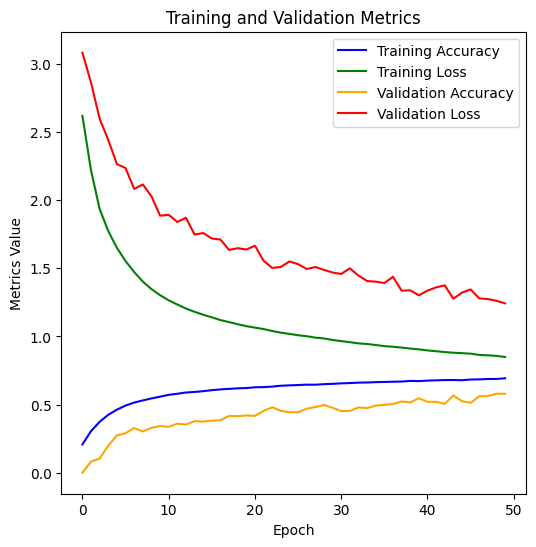

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss', color='green')

# Plot Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Plot Validation Loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()

plt.grid(False)
plt.show()


# Hyperparameter tuning

In [ ]:
#!pip install keras_tuner

In [ ]:
# # Define the hyperparameters search space
# hyperparam_distribution_range = {
#     'batch_size': [16, 32, 64, 128],
#     'learning_rate': [0.0001, 0.001, 0.01],
#     'hidden_size': [128, 256, 512, 1024],
#     'dense_units': [64, 128, 256, 512],
#     'dropout_rate': [0.1, 0.2, 0.3]
# }

# best_accuracy = 0.0
# best_hyperparameters = {}

# for batch_size in hyperparam_distribution_range['batch_size']:
#     for learning_rate in hyperparam_distribution_range['learning_rate']:
#         for hidden_size in hyperparam_distribution_range['hidden_size']:
#             for dense_units in hyperparam_distribution_range['dense_units']:
#                 for dropout_rate in  hyperparam_distribution_range['dropout_rate']:
#                     print(batch_size, learning_rate, hidden_size, dense_units, dropout_rate)
#                     # Build the model
#                     model = create_model((pre_processed_X_train.shape[1], pre_processed_X_train.shape[2]), batch_size, hidden_size, dropout_rate, learning_rate, dense_units)
                    
#                     # Train the model
#                     model.fit(pre_processed_X_train, y_train_reshaped, epochs=50, verbose=0, validation_split=0.2, shuffle=True)
    
#                     # Get the validation accuracy from the history
#                     val_accuracy = history.history['val_accuracy'][-1]
    
#                     # Check if it is the highest accuracy
#                     if val_accuracy > best_accuracy:
#                         best_hyperparameters = {
#                             'batch_size': batch_size,
#                             'learning_rate': learning_rate,
#                             'hidden_size': hidden_size,
#                             'dense_units': dense_units,
#                             'dropout_rate': dropout_rate
#                         }
                

# # Print the best hyperparameters and accuracy
# print("Best Hyperparameters:")
# print(best_hyperparameters)
# print("Best Accuracy:", best_accuracy)

# Confusion Matrix on Test data

In [ ]:
# !pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predicted labels
y_pred = model.predict(pre_processed_X_test)

# Remove the center dimension
y_pred = y_pred[:, 0, :]

print("Shape of y_pred after squeezing:", y_pred.shape)

# If your model outputs probabilities and you want to get the class with highest probability
# Converts one hot encoded labels back to integer values
y_pred_classes = np.argmax(y_pred, axis=1)



# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Label Mapping:")
for label, emotion in label_map_with_gender.items():
    print(f"{label}: {emotion}")


# Evaluation using F1 score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions and calculate metrics
y_pred = model.predict(pre_processed_X_test)
# Remove the center dimension
y_pred = y_pred[:, 0, :]
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

print("\n")

# For a detailed classification report including precision, recall, f1-score per class
print(classification_report(y_test, y_pred_classes))

# Make Predictions

In [ ]:
# import librosa

# # Function to extract features
# def extract_features(audio_file):
#   # Load audio file
#   data, sample_rate = librosa.load(audio_file)

#   # Extract features
#   mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
#   spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T,axis=0)
#   chroma = np.mean(librosa.feature.chroma_stft(y=data, sr=sample_rate).T,axis=0)
#   mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T,axis=0)
#   tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sample_rate).T,axis=0)

#   # Create dataframe with extracted features
#   features = np.concatenate([mfcc, spectral_contrast, chroma, mel, tonnetz])
#   feature_names = [f'MFCC_{i}' for i in range(mfcc.shape[0])] + \
#                     [f'SPECTRAL_CONTRAST_{i}' for i in range(spectral_contrast.shape[0])] + \
#                     [f'CHROMA_{i}' for i in range(chroma.shape[0])] + \
#                     [f'MEL_{i}' for i in range(mel.shape[0])] + \
#                     [f'TONZ_{i}' for i in range(tonnetz.shape[0])]
#   feature_df = pd.DataFrame([features], columns=feature_names)

#   return feature_df


# # Function to reshape feature
# def reshape_feature(extracted_feature):
#   extracted_feature = extracted_feature.values
#   reshaped_feature = np.expand_dims(extracted_feature, -1)

#   return reshaped_feature


# # Function to prediction
# def get_prediction(audio_feature, with_gender):
#   prediction = model.predict(audio_feature)
#   label = np.argmax(prediction, axis=1)
#   if with_gender:
#     categorical_label = label_map_with_gender[label[0]]
#   else:
#     categorical_label = label_map_without_gender[label[0]]

#   return categorical_label

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>